# TP 2

In [1]:
from sklearn.preprocessing import scale, MinMaxScaler
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import seaborn as sns
import pandas as pd

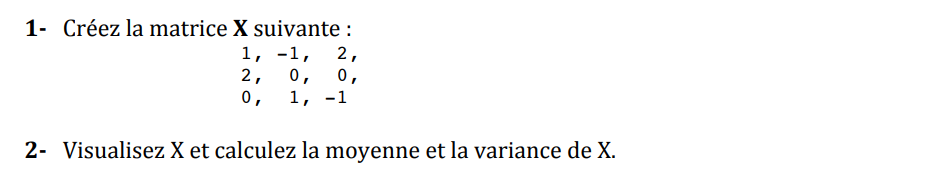

In [5]:
X = [(1, -1, 2), (2, 0, 0),(0, 1, -1)]
print("la matrice X :",X)
moy = np.mean(X)
print("la moyenne de X :",moy)
var = np.var(X)
print("la variance de X :",var)

la matrice X : [(1, -1, 2), (2, 0, 0), (0, 1, -1)]
la moyenne de X : 0.4444444444444444
la variance de X : 1.1358024691358024


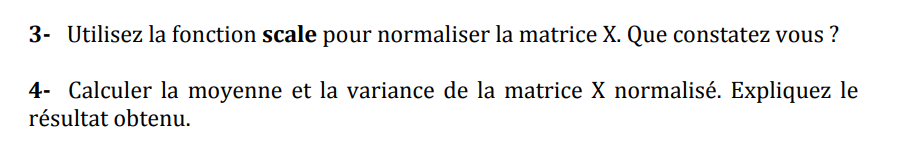

In [7]:
normalized_X = scale(X, axis=0, with_mean=True, with_std=True, copy=True)
print(normalized_X)

[[ 0.         -1.22474487  1.33630621]
 [ 1.22474487  0.         -0.26726124]
 [-1.22474487  1.22474487 -1.06904497]]


#  NB:Les valeurs de la matrice X sont changées


In [8]:
moy2 = np.mean(normalized_X)
var2 = np.var(normalized_X)
print("la moyenne aprés normalisation :",moy2)
print("la variance aprés normalisation :",var2)

la moyenne aprés normalisation : 4.9343245538895844e-17
la variance aprés normalisation : 1.0


# NB: les données suivent une loi normale centrée réduite

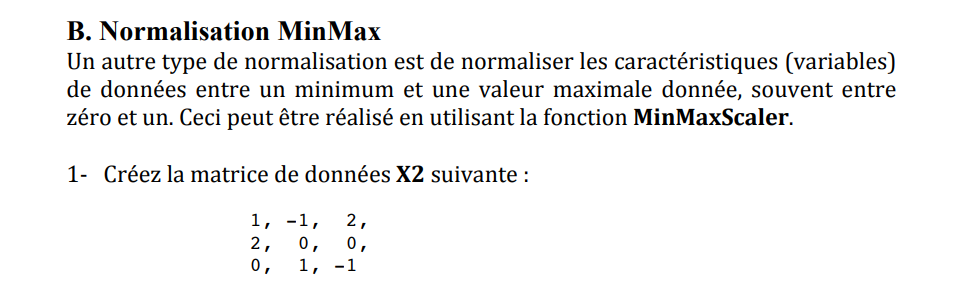

In [13]:
X2 = np.array([[1,-1,0],[2,0,0],[0,1,-1]])

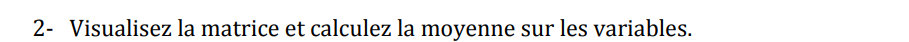

In [17]:
print("Affichage de la matrice X2:\n",X,"\n")

moy = X2.mean(0)
print("Moyenne sur les vriables de X2:",moy)

Affichage de la matrice X2:
 [(1, -1, 2), (2, 0, 0), (0, 1, -1)] 

Moyenne sur les vriables de X2: [ 1.          0.         -0.33333333]


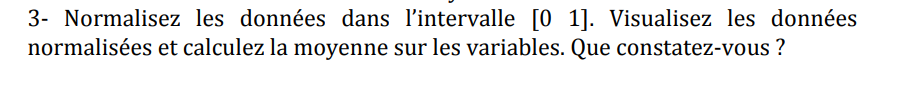

In [19]:
scaler = MinMaxScaler(feature_range=(0, 1), copy=True)
normalized_X2 = scaler.fit(X2)

print("la matrice X2 normalisée:\n", normalized_X2.transform(X2))

la matrice X2 normalisée:
 [[0.5 0.  1. ]
 [1.  0.5 1. ]
 [0.  1.  0. ]]


# NB:Les valeur de la matrice X2 sont transformer et comprisent entre 0 et 1

# 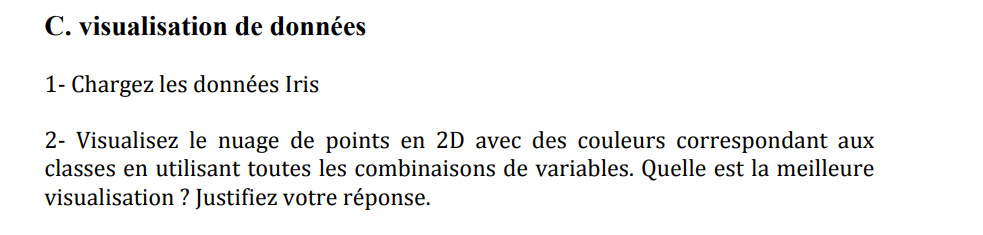

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

# plt.figure()
# plt.scatter(iris.data[:,0], iris.data[:,1], c=iris.target)
# axes = plt.gca()
# plt.ylabel('Axe Y')
# plt.xlabel('Axe X')
# plt.title("Génération de données et affichage")

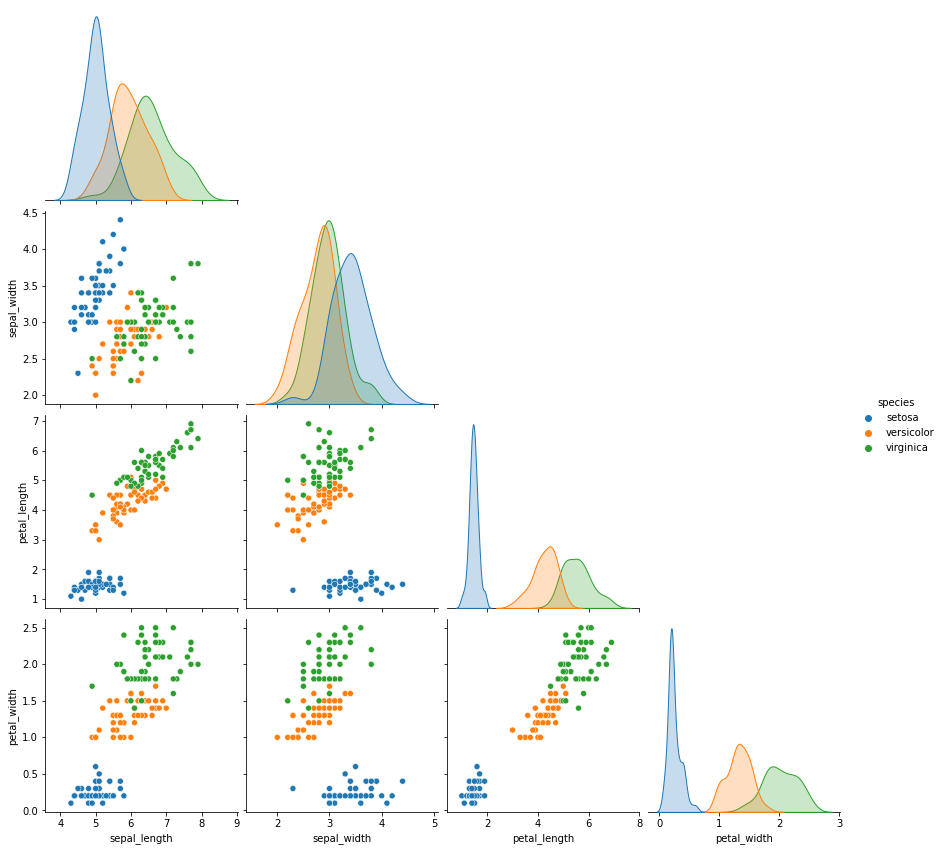

In [20]:
df = sns.load_dataset("iris")
sns.pairplot(df, hue="species", corner=True, height=3)

# NB:Les plots 5 et 6 sont mieux séparées par rapport aux autres car les classes sont moins correlées

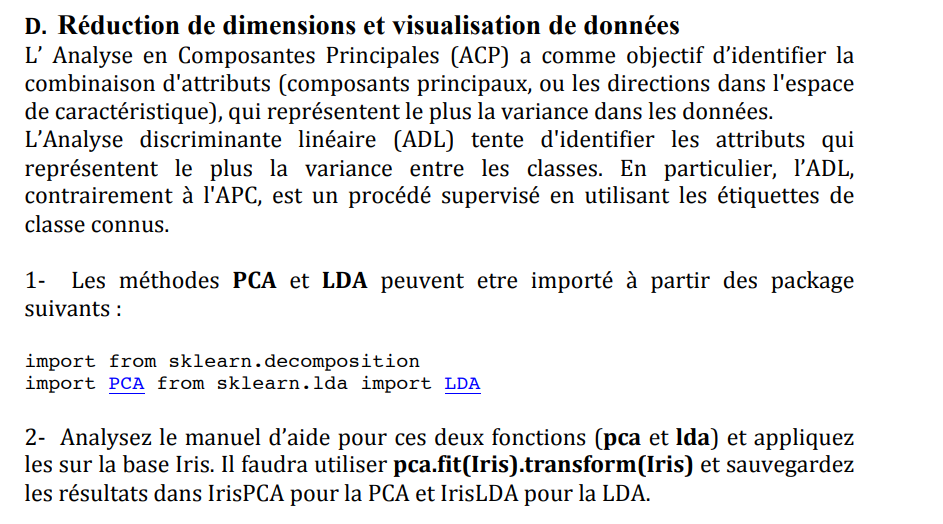

In [8]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [47]:
X = iris.data
y = iris.target

lda = LDA()
fitLDA = lda.fit(X, y)
Iris_LDA = fitLDA.transform(X)

pca = PCA()
fitPCA = pca.fit(X, y)
Iris_PCA = fitPCA.transform(X)

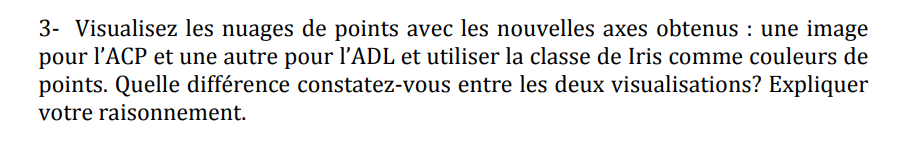

Text(0.5, 1.0, 'LDA of IRIS dataset')

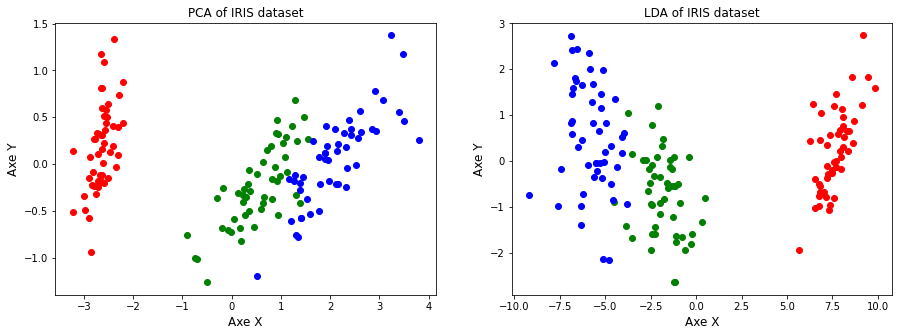

In [48]:
fig,axis=plt.subplots(1,2,figsize=(15,5))
axes=axis.reshape(2,)

for c, i, target_name in zip("rgb", [0, 1, 2], iris.target_names):
    axes[0].scatter(Iris_PCA[y == i, 0], Iris_PCA[y == i, 1], c=c, label=target_name)
axes[0].set_xlabel("Axe X", fontsize=12)
axes[0].set_ylabel("Axe Y", fontsize=12)
axes[0].set_title('PCA of IRIS dataset')

for c, i, target_name in zip("rgb", [0, 1, 2], iris.target_names):
    axes[1].scatter(Iris_LDA[y == i, 0], Iris_LDA[y == i, 1], c=c, label=target_name)
axes[1].set_xlabel("Axe X", fontsize=12)
axes[1].set_ylabel("Axe Y", fontsize=12)
axes[1].set_title('LDA of IRIS dataset')